In [1]:
!git clone https://github.com/jan1na/Neural-Cellular-Automata.git

%cd Neural-Cellular-Automata

Cloning into 'Neural-Cellular-Automata'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 82 (delta 48), reused 39 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (82/82), 148.54 KiB | 664.00 KiB/s, done.
Resolving deltas: 100% (48/48), done.
/content/Neural-Cellular-Automata


In [2]:
!pip install -q medmnist

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from medmnist import PathMNIST
import medmnist
from tqdm import tqdm
from train_utils import train, evaluate, plot_training_history
from models import CNNBaseline

from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.3 MB/s eta 0:00:00
Mounted at /content/drive
Mounted at /content/drive


In [3]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = PathMNIST(split='train', transform=transform, download=True)
val_dataset = PathMNIST(split='val', transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


 95%|█████████▌| 196M/206M [00:41<00:00, 20.8MB/s]
100%|██████████| 206M/206M [00:41<00:00, 4.93MB/s]


Epoch 01: Train Acc = 0.5972, Val Acc = 0.6958
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Training:   2%|▏         | 24/1407 [00:00<00:18, 72.90it/s, loss=0.849]

Epoch 01: Train Acc = 0.5972, Val Acc = 0.6958
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 02: Train Acc = 0.7191, Val Acc = 0.7456
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 02: Train Acc = 0.7191, Val Acc = 0.7456
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 03: Train Acc = 0.7575, Val Acc = 0.7130


Epoch 03: Train Acc = 0.7575, Val Acc = 0.7130


Epoch 04: Train Acc = 0.7830, Val Acc = 0.7548
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 04: Train Acc = 0.7830, Val Acc = 0.7548
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 05: Train Acc = 0.7990, Val Acc = 0.8203
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 05: Train Acc = 0.7990, Val Acc = 0.8203
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 06: Train Acc = 0.8117, Val Acc = 0.8341
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 06: Train Acc = 0.8117, Val Acc = 0.8341
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 07: Train Acc = 0.8250, Val Acc = 0.8497
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 07: Train Acc = 0.8250, Val Acc = 0.8497
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 08: Train Acc = 0.8349, Val Acc = 0.8339


Epoch 08: Train Acc = 0.8349, Val Acc = 0.8339


Epoch 09: Train Acc = 0.8471, Val Acc = 0.8381


Epoch 09: Train Acc = 0.8471, Val Acc = 0.8381


Epoch 10: Train Acc = 0.8523, Val Acc = 0.8559
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 10: Train Acc = 0.8523, Val Acc = 0.8559
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 11: Train Acc = 0.8624, Val Acc = 0.8430


Epoch 11: Train Acc = 0.8624, Val Acc = 0.8430


Epoch 12: Train Acc = 0.8690, Val Acc = 0.8628
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 12: Train Acc = 0.8690, Val Acc = 0.8628
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 13: Train Acc = 0.8734, Val Acc = 0.8261


Epoch 13: Train Acc = 0.8734, Val Acc = 0.8261


Epoch 14: Train Acc = 0.8787, Val Acc = 0.8845
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 14: Train Acc = 0.8787, Val Acc = 0.8845
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 15: Train Acc = 0.8826, Val Acc = 0.8944
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 15: Train Acc = 0.8826, Val Acc = 0.8944
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth


Epoch 16: Train Acc = 0.8888, Val Acc = 0.8843


Epoch 16: Train Acc = 0.8888, Val Acc = 0.8843


Epoch 17: Train Acc = 0.8930, Val Acc = 0.8874


Epoch 17: Train Acc = 0.8930, Val Acc = 0.8874


Epoch 18: Train Acc = 0.8963, Val Acc = 0.9005
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth
Converged with >90% accuracy!
Training complete.


Epoch 18: Train Acc = 0.8963, Val Acc = 0.9005
Best model saved to: /content/drive/MyDrive/NCA/best_cnn_pathmnist.pth
Converged with >90% accuracy!
Training complete.


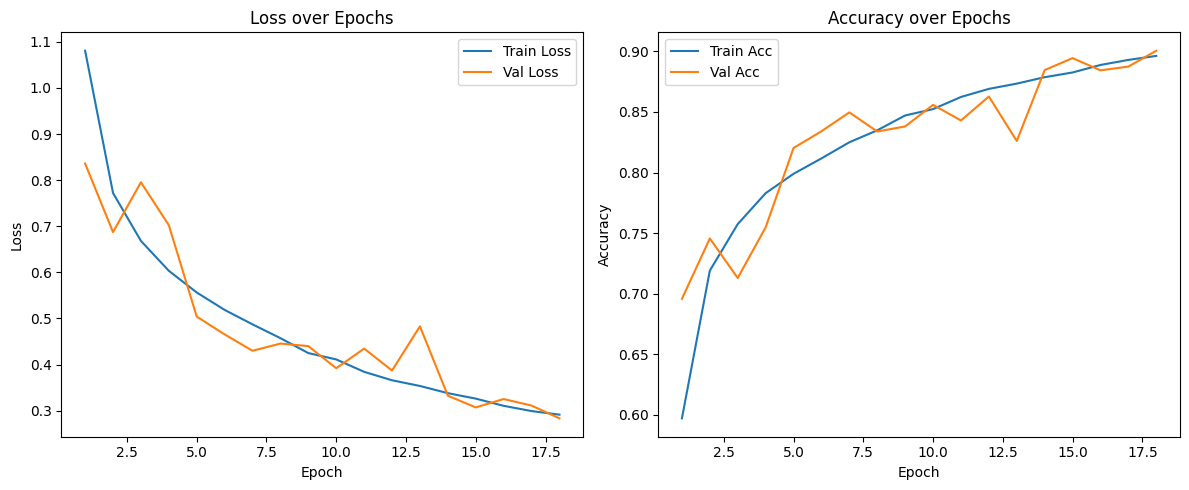

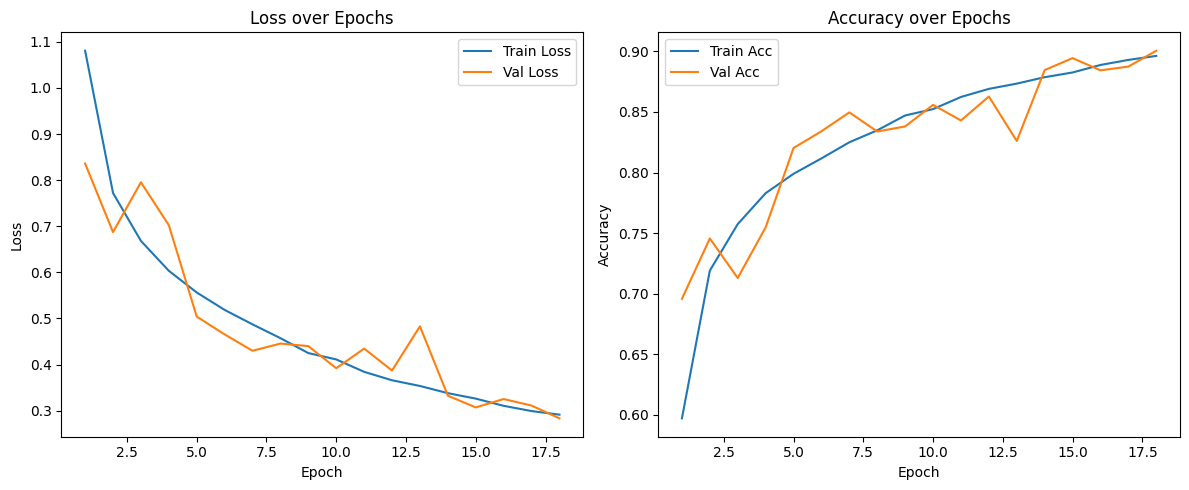

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNNBaseline().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

save_path = '/content/drive/MyDrive/NCA/best_cnn_pathmnist.pth'
plot_save_path = '/content/drive/MyDrive/NCA/cnn_training_history.png'
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_acc = 0.0

for epoch in range(1, 31):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    # Save for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch:02d}: Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"Best model saved to: {save_path}")

    if val_acc > 0.90:
        print("Converged with >90% accuracy!")
        break

print("Training complete.")

plot_training_history(train_losses, train_accuracies, val_losses, val_accuracies, plot_save_path)